Пишем Log-регрессию


In [201]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [202]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [203]:
from sklearn.base import BaseEstimator, RegressorMixin

class LogReg():
    def __init__(self, batch_size=25, num_steps=350, lr=1e-2):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        for i in range(self.num_steps):
            sample_indices = np.random.randint(0, n_objects, size=batch_size)
            x = X[sample_indices]
            y = Y[sample_indices]
            grad = x.T @ (sigmoid(x @ w).reshape(-1) - y).reshape((batch_size, 1))
            w -= self.lr * grad

        self.w = w
        return self

    def predict(self, X):
        pred = sigmoid(X @ self.w)
        pred[pred > 0.5] = 1
        pred[pred <= 0.5] = 0
        return pred.reshape(-1)

In [204]:
random_seed = 43
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 50
np.random.seed(random_seed)

# Генерим истинные веса
w_true = np.random.normal(size=(n_features, ))

# Под веса создаем признаки
X = np.random.uniform(-5, 5, (n_objects, n_features))

X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] 

# Создаем таргет
Y = sigmoid(X.dot(w_true))
Y[Y > 0.5] = 1
Y[Y <= 0.5] = 0

In [205]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [206]:
own_model = LogReg().fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)

In [207]:
sklearn_model = LogisticRegression().fit(x_scaled, y_train)
y_sklearnpred = sklearn_model.predict(x_test_scaled)

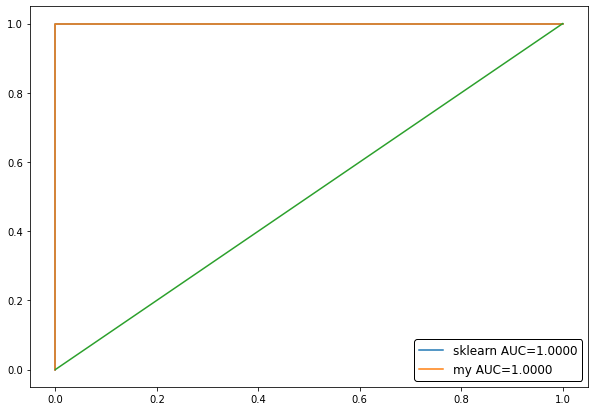

In [208]:
sklearn_auc = roc_auc_score(y_test, y_sklearnpred)
my_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_test, y_sklearnpred)[:2], label='sklearn AUC={:.4f}'.format(sklearn_auc))
plt.plot(*roc_curve(y_test, y_pred)[:2], label='my AUC={:.4f}'.format(my_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [209]:
from sklearn.base import BaseEstimator, RegressorMixin

class RegL2(BaseEstimator, RegressorMixin):
    def __init__(self, num_steps=350, lr=1e-2, alpha=0.1):
        self.num_steps = num_steps
        self.lr = lr
        self.alpha = alpha

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        for i in range(self.num_steps):
            w -= self.lr * (2 * (X.T @ (X @ w - Y.reshape((Y.shape[0], 1)))) + 2 * self.alpha * w) / Y.size

        self.w = w
        return self

    def predict(self, X):
        return X @ self.w

In [210]:
Y = X.dot(w_true)

In [211]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split


# разделение данных на train и test
x_train, x_test, y_train, y_test = train_test_split(X, Y)
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

lasso_regression = Ridge(alpha=0.1) # alpha — величина регуляризации

# обучение
lasso_regression.fit(train_X, train_y)


Ridge(alpha=0.1)

In [212]:
from sklearn.metrics import r2_score

own_model = RegL2().fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)
own_r2 = r2_score(y_test, y_pred)

sklearn_model = Ridge(alpha=0.1).fit(x_scaled, y_train)
y_pred = sklearn_model.predict(x_test_scaled)

sklearn_r2 = r2_score(y_test, y_pred)

print('R^2 in own model:', own_r2)
print('R^2 in sklearn loss:', sklearn_r2)

R^2 in own model: 0.9990735823435589
R^2 in sklearn loss: 0.9999997791405969
